In [ ]:
conda activate pyvizenv

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [173]:
# Import Libraries
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import json
import panel as pn
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
pn.extension('plotly')
import plotly.express as px
import seaborn as sns
import yfinance as yf

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load .env environment
load_dotenv()


True

In [4]:
# Pull in API Key
api_key = os.getenv("glassnode_api")
type(api_key)


str

In [5]:
# Define crypto currencies to pull
crypto_list = ["BTC", "BCH", "ETH", "LTC", "USDT", "DOGE"]


In [6]:
# Define Market URLs
price_url = 'https://api.glassnode.com/v1/metrics/market/price_usd'
volume_url = 'https://api.glassnode.com/v1/metrics/transactions/transfers_volume_sum'
mkt_cap_url = 'https://api.glassnode.com/v1/metrics/market/marketcap_usd'

# Define Demand URLs
total_addresses_url = 'https://api.glassnode.com/v1/metrics/addresses/count'
sending_addresses_url = 'https://api.glassnode.com/v1/metrics/addresses/sending_count'
receiving_addresses_url = 'https://api.glassnode.com/v1/metrics/addresses/receiving_count'
active_addresses_url = 'https://api.glassnode.com/v1/metrics/addresses/active_count'
transactions_url = 'https://api.glassnode.com/v1/metrics/transactions/count'

# Define Supply URLs
circulating_supply_url = 'https://api.glassnode.com/v1/metrics/supply/current'

# Define Mining Revenue URLs
mining_revenue_sum_url = 'https://api.glassnode.com/v1/metrics/mining/revenue_sum'

# Define Indicator URLs
rhodl_ratio_url = 'https://api.glassnode.com/v1/metrics/indicators/rhodl_ratio'


## BTC API Data Pull

In [7]:
# Price API Request
btc_price_res = requests.get(price_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert price to Pandas Dataframe, set index to time and clean up file
btc_price_df = pd.read_json(btc_price_res.text, convert_dates=['t'])
btc_price_df.columns = ['Date', 'BTC Price']
btc_price_df.set_index('Date', inplace=True) 


# Volume API Request
btc_volume_res = requests.get(volume_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert volume to Pandas Dataframe, set index to time and clean up file
btc_volume_df = pd.read_json(btc_volume_res.text, convert_dates=['t'])
btc_volume_df.columns = ['Date', 'BTC Volume']
btc_volume_df.set_index('Date', inplace=True)



# Market Cap API Request
btc_mkt_cap_res = requests.get(mkt_cap_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Market Cap to Pandas Dataframe, set index to time and clean up file
btc_mkt_cap_df = pd.read_json(btc_mkt_cap_res.text, convert_dates=['t'])
btc_mkt_cap_df.columns = ['Date', 'BTC Market Cap']
btc_mkt_cap_df.set_index('Date', inplace=True)



# Mining API Request
btc_mining_res = requests.get(mining_revenue_sum_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Mining to Pandas Dataframe, set index to time and clean up file
btc_mining_df = pd.read_json(btc_mining_res.text, convert_dates=['t'])
btc_mining_df.columns = ['Date', 'BTC Mining Revenue']
btc_mining_df.set_index('Date', inplace=True)



# RHODL API Request
btc_rhodl_res = requests.get(rhodl_ratio_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert RHODL to Pandas Dataframe, set index to time and clean up file
btc_rhodl_df = pd.read_json(btc_rhodl_res.text, convert_dates=['t'])
btc_rhodl_df.columns = ['Date', 'BTC RHDOL Ratio']
btc_rhodl_df.set_index('Date', inplace=True)


# Supply API Request
btc_supply_res = requests.get(circulating_supply_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Supply to Pandas Dataframe, set index to time and clean up file
btc_supply_df = pd.read_json(btc_supply_res.text, convert_dates=['t'])
btc_supply_df.columns = ['Date', 'BTC Supply']
btc_supply_df.set_index('Date', inplace=True)


# Total Addresses API Request
btc_total_addresses_res = requests.get(total_addresses_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Total Addresses to Pandas Dataframe, set index to time and clean up file
btc_total_addresses_df = pd.read_json(btc_total_addresses_res.text, convert_dates=['t'])
btc_total_addresses_df.columns = ['Date', 'BTC Total Addresses']
btc_total_addresses_df.set_index('Date', inplace=True)


# Sending Addresses API Request
btc_sending_addresses_res = requests.get(sending_addresses_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Sending Addresses to Pandas Dataframe, set index to time and clean up file
btc_sending_addresses_df = pd.read_json(btc_sending_addresses_res.text, convert_dates=['t'])
btc_sending_addresses_df.columns = ['Date', 'BTC Sending Addresses']
btc_sending_addresses_df.set_index('Date', inplace=True)


# Receiving Addresses API Request
btc_receiving_addresses_res = requests.get(receiving_addresses_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Receiving Addresses to Pandas Dataframe, set index to time and clean up file
btc_receiving_addresses_df = pd.read_json(btc_receiving_addresses_res.text, convert_dates=['t'])
btc_receiving_addresses_df.columns = ['Date', 'BTC Receiving Addresses']
btc_receiving_addresses_df.set_index('Date', inplace=True)



# Active Addresses API Request
btc_active_addresses_res = requests.get(active_addresses_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Active Addresses to Pandas Dataframe, set index to time and clean up file
btc_active_addresses_df = pd.read_json(btc_active_addresses_res.text, convert_dates=['t'])
btc_active_addresses_df.columns = ['Date', 'BTC Active Addresses']
btc_active_addresses_df.set_index('Date', inplace=True)



# Transactions API Request
btc_transactions_res = requests.get(transactions_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Active Addresses to Pandas Dataframe, set index to time and clean up file
btc_transactions_df = pd.read_json(btc_transactions_res.text, convert_dates=['t'])
btc_transactions_df.columns = ['Date','BTC Transactions']
btc_transactions_df.set_index('Date', inplace=True)



## BTC Data Table Debugging Cells

In [8]:
# btc_price_df

In [9]:
# btc_volume_df

In [10]:
# btc_mkt_cap_df

In [11]:
# btc_mining_df

In [12]:
# btc_rhodl_df

In [13]:
# btc_supply_df

In [14]:
# btc_total_addresses_df

In [15]:
# btc_sending_addresses_df

In [16]:
# btc_receiving_addresses_df

In [17]:
# btc_active_addresses_df

In [18]:
# btc_transactions_df

## BTC Daily Changes

In [19]:
# Daily change in price column
btc_daily_price_pct_change = btc_price_df.pct_change(1)
btc_daily_price_pct_change.columns = ['BTC Daily Price Change (%)']

# btc_daily_price_pct_change


## BTC Data Aggregating & Cleaning

In [20]:
# Define all the different data frames into a list
btc_frames = [btc_price_df,
              btc_daily_price_pct_change,
              btc_volume_df,
              btc_mkt_cap_df,
              btc_mining_df,
              btc_rhodl_df,
              btc_supply_df,
              btc_total_addresses_df,
              btc_sending_addresses_df,
              btc_receiving_addresses_df,
              btc_active_addresses_df,
              btc_transactions_df]

# Concatenate all the dataframes into one
btc_data = pd.concat(btc_frames, axis=1, join="outer", ignore_index=False)
btc_data


,BTC Price,BTC Daily Price Change (%),BTC Volume,BTC Market Cap,BTC Mining Revenue,BTC RHDOL Ratio,BTC Supply,BTC Total Addresses,BTC Sending Addresses,BTC Receiving Addresses,BTC Active Addresses,BTC Transactions
Date,,,,,,,,,,,,
2009-01-03,NaN,NaN,0.000000e+00,NaN,50.0,NaN,50.00,1.0,0.0,0.0,0.0,0.0
2009-01-04,NaN,NaN,0.000000e+00,NaN,0.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0
2009-01-05,NaN,NaN,0.000000e+00,NaN,0.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0
2009-01-06,NaN,NaN,0.000000e+00,NaN,0.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0
2009-01-07,NaN,NaN,0.000000e+00,NaN,0.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0
2009-01-08,NaN,NaN,0.000000e+00,NaN,0.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0
2009-01-09,NaN,NaN,0.000000e+00,NaN,700.0,NaN,750.00,15.0,0.0,0.0,0.0,0.0
2009-01-10,NaN,NaN,0.000000e+00,NaN,3050.0,NaN,3800.00,76.0,0.0,0.0,0.0,0.0
2009-01-11,NaN,NaN,0.000000e+00,NaN,4650.0,NaN,8450.00,169.0,0.0,0.0,0.0,0.0


## LTC API Data Pull

In [21]:
# Price API Request
ltc_price_res = requests.get(price_url,
                      params={'a': 'LTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert price to Pandas Dataframe, set index to time and clean up file
ltc_price_df = pd.read_json(ltc_price_res.text, convert_dates=['t'])
ltc_price_df.columns = ['Date', 'LTC Price']
ltc_price_df.set_index('Date', inplace=True) 


# Volume API Request
ltc_volume_res = requests.get(volume_url,
                      params={'a': 'LTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert volume to Pandas Dataframe, set index to time and clean up file
ltc_volume_df = pd.read_json(ltc_volume_res.text, convert_dates=['t'])
ltc_volume_df.columns = ['Date', 'LTC Volume']
ltc_volume_df.set_index('Date', inplace=True)



# Market Cap API Request
ltc_mkt_cap_res = requests.get(mkt_cap_url,
                      params={'a': 'LTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Market Cap to Pandas Dataframe, set index to time and clean up file
ltc_mkt_cap_df = pd.read_json(ltc_mkt_cap_res.text, convert_dates=['t'])
ltc_mkt_cap_df.columns = ['Date', 'LTC Market Cap']
ltc_mkt_cap_df.set_index('Date', inplace=True)



# Mining API Request
ltc_mining_res = requests.get(mining_revenue_sum_url,
                      params={'a': 'LTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Mining to Pandas Dataframe, set index to time and clean up file
ltc_mining_df = pd.read_json(ltc_mining_res.text, convert_dates=['t'])
ltc_mining_df.columns = ['Date', 'LTC Mining Revenue']
ltc_mining_df.set_index('Date', inplace=True)



# # RHODL API Request
# ltc_rhodl_res = requests.get(rhodl_ratio_url,
#                       params={'a': 'LTC',
#                               'i': '24h',
#                               'api_key': api_key})


# # Convert RHODL to Pandas Dataframe, set index to time and clean up file
# ltc_rhodl_df = pd.read_json(ltc_rhodl_res.text, convert_dates=['t'])
# ltc_rhodl_df.columns = ['Date', 'LTC RHDOL Ratio']
# ltc_rhodl_df.set_index('Date', inplace=True)


# Supply API Request
ltc_supply_res = requests.get(circulating_supply_url,
                      params={'a': 'LTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Supply to Pandas Dataframe, set index to time and clean up file
ltc_supply_df = pd.read_json(ltc_supply_res.text, convert_dates=['t'])
ltc_supply_df.columns = ['Date', 'LTC Supply']
ltc_supply_df.set_index('Date', inplace=True)


# Total Addresses API Request
ltc_total_addresses_res = requests.get(total_addresses_url,
                      params={'a': 'LTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Total Addresses to Pandas Dataframe, set index to time and clean up file
ltc_total_addresses_df = pd.read_json(ltc_total_addresses_res.text, convert_dates=['t'])
ltc_total_addresses_df.columns = ['Date', 'LTC Total Addresses']
ltc_total_addresses_df.set_index('Date', inplace=True)


# Sending Addresses API Request
ltc_sending_addresses_res = requests.get(sending_addresses_url,
                      params={'a': 'LTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Sending Addresses to Pandas Dataframe, set index to time and clean up file
ltc_sending_addresses_df = pd.read_json(ltc_sending_addresses_res.text, convert_dates=['t'])
ltc_sending_addresses_df.columns = ['Date', 'LTC Sending Addresses']
ltc_sending_addresses_df.set_index('Date', inplace=True)


# Receiving Addresses API Request
ltc_receiving_addresses_res = requests.get(receiving_addresses_url,
                      params={'a': 'LTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Receiving Addresses to Pandas Dataframe, set index to time and clean up file
ltc_receiving_addresses_df = pd.read_json(ltc_receiving_addresses_res.text, convert_dates=['t'])
ltc_receiving_addresses_df.columns = ['Date', 'LTC Receiving Addresses']
ltc_receiving_addresses_df.set_index('Date', inplace=True)



# Active Addresses API Request
ltc_active_addresses_res = requests.get(active_addresses_url,
                      params={'a': 'LTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Active Addresses to Pandas Dataframe, set index to time and clean up file
ltc_active_addresses_df = pd.read_json(ltc_active_addresses_res.text, convert_dates=['t'])
ltc_active_addresses_df.columns = ['Date', 'LTC Active Addresses']
ltc_active_addresses_df.set_index('Date', inplace=True)



# Transactions API Request
ltc_transactions_res = requests.get(transactions_url,
                      params={'a': 'LTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Active Addresses to Pandas Dataframe, set index to time and clean up file
ltc_transactions_df = pd.read_json(ltc_transactions_res.text, convert_dates=['t'])
ltc_transactions_df.columns = ['Date','LTC Transactions']
ltc_transactions_df.set_index('Date', inplace=True)

## LTC Data Table Debugging Cells

In [22]:
# ltc_price_df.head(5)

In [23]:
# ltc_volume_df.head(5)

In [24]:
# ltc_mkt_cap_df.head(5)

In [25]:
# ltc_mining_df.head(5)

In [26]:
# ltc_rhodl_df.head(5)

In [27]:
# ltc_supply_df.head(5)

In [28]:
# ltc_total_addresses_df.head(5)

In [29]:
# ltc_sending_addresses_df.head(5)

In [30]:
# ltc_receiving_addresses_df.head(5)

In [31]:
# ltc_active_addresses_df.head(5)

In [32]:
# ltc_transactions_df.head(5)

## LTC Daily Changes

In [33]:
# Daily change in price column
ltc_daily_price_pct_change = ltc_price_df.pct_change(1)
ltc_daily_price_pct_change.columns = ['LTC Daily Price Change (%)']

# ltc_daily_price_pct_change

## LTC Data Aggregating & Cleaning

In [34]:
# Define all the different data frames into a list
ltc_frames = [ltc_price_df,
              ltc_daily_price_pct_change,
              ltc_volume_df,
              ltc_mkt_cap_df,
              ltc_mining_df,
#               ltc_rhodl_df,
              ltc_supply_df,
              ltc_total_addresses_df,
              ltc_sending_addresses_df,
              ltc_receiving_addresses_df,
              ltc_active_addresses_df,
              ltc_transactions_df]

# Concatenate all the dataframes into one
ltc_data = pd.concat(ltc_frames, axis=1, join="outer", ignore_index=False)
ltc_data

,LTC Price,LTC Daily Price Change (%),LTC Volume,LTC Market Cap,LTC Mining Revenue,LTC Supply,LTC Total Addresses,LTC Sending Addresses,LTC Receiving Addresses,LTC Active Addresses,LTC Transactions
Date,,,,,,,,,,,
2011-10-13,NaN,NaN,4.419948e+04,NaN,484100.001000,484250.0,9777.0,849.0,110.0,919.0,92.0
2011-10-14,NaN,NaN,2.251838e+04,NaN,56100.002000,540350.0,10941.0,425.0,55.0,464.0,62.0
2011-10-15,NaN,NaN,3.068284e+04,NaN,38100.075000,578450.0,12205.0,764.0,528.0,927.0,438.0
2011-10-16,NaN,NaN,1.991927e+05,NaN,45750.907071,624250.0,14624.0,3978.0,1592.0,4271.0,1415.0
2011-10-17,NaN,NaN,9.149340e+04,NaN,38650.356248,662850.0,16975.0,2432.0,1727.0,2705.0,1578.0
2011-10-18,NaN,NaN,1.622171e+05,NaN,41300.374511,704050.0,19491.0,2962.0,1879.0,3269.0,1651.0
2011-10-19,NaN,NaN,8.609010e+04,NaN,32150.316770,736100.0,21531.0,1921.0,1596.0,2212.0,1388.0
2011-10-20,NaN,NaN,1.176173e+05,NaN,37950.317304,774250.0,24137.0,2995.0,2058.0,3303.0,1851.0
2011-10-21,NaN,NaN,9.169066e+04,NaN,41550.308110,815800.0,26651.0,2426.0,1881.0,2724.0,1681.0


## ETH API Data Pull

In [42]:
# Price API Request
eth_price_res = requests.get(price_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})
# Convert price to Pandas Dataframe, set index to time and clean up file
eth_price_df = pd.read_json(eth_price_res.text, convert_dates=['t'])
eth_price_df.columns = ['Date', 'ETH Price']
eth_price_df.set_index('Date', inplace=True) 

# Volume API Request
eth_volume_res = requests.get(volume_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})
# Convert volume to Pandas Dataframe, set index to time and clean up file
eth_volume_df = pd.read_json(eth_volume_res.text, convert_dates=['t'])
eth_volume_df.columns = ['Date', 'ETH Volume']
eth_volume_df.set_index('Date', inplace=True)

# Market Cap API Request
eth_mkt_cap_res = requests.get(mkt_cap_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})
# Convert Market Cap to Pandas Dataframe, set index to time and clean up file
eth_mkt_cap_df = pd.read_json(eth_mkt_cap_res.text, convert_dates=['t'])
eth_mkt_cap_df.columns = ['Date', 'ETH Market Cap']
eth_mkt_cap_df.set_index('Date', inplace=True)


# Total Addresses API Request
eth_total_addresses_res = requests.get(total_addresses_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})

# Convert to Pandas Dataframe, set index to time and clean up file
eth_total_addresses_df = pd.read_json(eth_total_addresses_res.text, convert_dates=['t'])
eth_total_addresses_df.columns = ['Date', 'ETH Total Addresses']
eth_total_addresses_df.set_index('Date', inplace=True) 

# Sending Addresses API Request
eth_sending_addresses_res = requests.get(sending_addresses_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})

# Convert to Pandas Dataframe, set index to time and clean up file
eth_sending_addresses_df = pd.read_json(eth_sending_addresses_res.text, convert_dates=['t'])
eth_sending_addresses_df.columns = ['Date', 'ETH Sending Addresses']
eth_sending_addresses_df.set_index('Date', inplace=True) 

# Receiving Addresses API Request
eth_receiving_addresses_res = requests.get(receiving_addresses_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})

# Convert to Pandas Dataframe, set index to time and clean up file
eth_receiving_addresses_df = pd.read_json(eth_receiving_addresses_res.text, convert_dates=['t'])
eth_receiving_addresses_df.columns = ['Date', 'ETH Receiving Addresses']
eth_receiving_addresses_df.set_index('Date', inplace=True) 

# Active Addresses API Request
eth_active_addresses_res = requests.get(active_addresses_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})

# Convert to Pandas Dataframe, set index to time and clean up file
eth_active_addresses_df = pd.read_json(eth_active_addresses_res.text, convert_dates=['t'])
eth_active_addresses_df.columns = ['Date', 'ETH Active Addresses']
eth_active_addresses_df.set_index('Date', inplace=True) 

# Transactions Addresses API Request
eth_transactions_res = requests.get(transactions_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})

# Convert to Pandas Dataframe, set index to time and clean up file
eth_transactions_df = pd.read_json(eth_transactions_res.text, convert_dates=['t'])
eth_transactions_df.columns = ['Date', 'ETH Transactions']
eth_transactions_df.set_index('Date', inplace=True) 


# Circulating Supply API Request
eth_circulating_supply_res = requests.get(circulating_supply_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})

# Convert Mining to Pandas Dataframe, set index to time and clean up file
eth_supply_df = pd.read_json(eth_circulating_supply_res.text, convert_dates=['t'])
eth_supply_df.columns = ['Date', 'ETH Circulating Supply']
eth_supply_df.set_index('Date', inplace=True)



# Mining API Request
eth_mining_revenue_sum_res = requests.get(mining_revenue_sum_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})

# Convert Mining to Pandas Dataframe, set index to time and clean up file
eth_mining_revenue_sum_df = pd.read_json(eth_mining_revenue_sum_res.text, convert_dates=['t'])
eth_mining_revenue_sum_df.columns = ['Date', 'ETH Blocks Mined']
eth_mining_revenue_sum_df.set_index('Date', inplace=True)

## ETH Data Table Debugging Cells

In [44]:
#  eth_price_df

In [ ]:
# total_addresses_df

In [ ]:
# sending_addresses_df

In [ ]:
# receiving_addresses_df

In [ ]:
# active_addresses_df

In [ ]:
# eth_mining_revenue_sum_df

In [ ]:
# eth_volume_df

In [ ]:
# eth_mkt_cap_df

In [ ]:
# transactions_df

In [ ]:
# circulating_supply_df

## ETH Daily Change

In [46]:
# Daily change in price column
eth_daily_price_pct_change = eth_price_df.pct_change(1)
eth_daily_price_pct_change.columns = ['ETH Daily Price Change (%)']

# ltc_daily_price_pct_change

## ETH Data Aggregating & Cleaning

In [47]:
# Define all the different data frames into a list
eth_frames = [eth_price_df,
              eth_daily_price_pct_change,
              eth_volume_df,
              eth_mkt_cap_df,
              eth_mining_revenue_sum_df,
#               eth_rhodl_df,
              eth_supply_df,
              eth_total_addresses_df,
              eth_sending_addresses_df,
              eth_receiving_addresses_df,
              eth_active_addresses_df,
              eth_transactions_df]

# Concatenate all the dataframes into one
eth_data = pd.concat(eth_frames, axis=1, join="outer", ignore_index=False)
eth_data

,ETH Price,ETH Daily Price Change (%),ETH Volume,ETH Market Cap,ETH Blocks Mined,ETH Circulating Supply,ETH Total Addresses,ETH Sending Addresses,ETH Receiving Addresses,ETH Active Addresses,ETH Transactions
Date,,,,,,,,,,,
2015-07-30,NaN,NaN,NaN,NaN,39311.093750,7.204930e+07,9203.0,0.0,0.0,0.0,NaN
2015-07-31,NaN,NaN,NaN,NaN,36191.718750,7.208549e+07,9359.0,0.0,0.0,0.0,NaN
2015-08-01,NaN,NaN,NaN,NaN,27702.187500,7.211320e+07,9474.0,0.0,0.0,0.0,NaN
2015-08-02,NaN,NaN,NaN,NaN,28227.187500,7.214142e+07,9561.0,0.0,0.0,0.0,NaN
2015-08-03,NaN,NaN,NaN,NaN,27976.718750,7.216940e+07,9637.0,0.0,0.0,0.0,NaN
2015-08-04,NaN,NaN,NaN,NaN,28478.437500,7.219788e+07,9694.0,0.0,0.0,0.0,NaN
2015-08-05,NaN,NaN,NaN,NaN,27528.593750,7.222541e+07,9747.0,0.0,0.0,0.0,NaN
2015-08-06,NaN,NaN,NaN,NaN,27075.468750,7.225248e+07,9788.0,0.0,0.0,0.0,NaN
2015-08-07,NaN,NaN,2.008619e+06,NaN,27474.974664,7.227992e+07,10288.0,778.0,606.0,1085.0,2035.0


## Reading 13wk Tbill Discount Rates

In [37]:
treasuries_discount_rate = yf.Ticker("^IRX")

In [38]:
tbills_df = yf.download("^IRX", start="2011-03-11", end="2021-03-21")

[*********************100%***********************]  1 of 1 completed


In [39]:
tbills_df=tbills_df.reset_index()
tbills_df.columns=['Date','tbills Open', 'tbills High', 'tbills Low', 'tbills Close', 'tbills Adj Close', 'tbills Volume']
tbills_df.head(5)

,Date,tbills Open,tbills High,tbills Low,tbills Close,tbills Adj Close,tbills Volume
0,2011-03-11,0.070,0.075,0.065,0.070,0.070,0
1,2011-03-14,0.070,0.080,0.065,0.075,0.075,0
2,2011-03-15,0.085,0.100,0.060,0.095,0.095,0
3,2011-03-16,0.090,0.095,0.085,0.085,0.085,0
4,2011-03-17,0.085,0.090,0.065,0.070,0.070,0


In [40]:
tbills_df=tbills_df[['Date','tbills Close']]
tbills_df.set_index('Date', inplace=True)
tbills_df.head(5)

,tbills Close
Date,
2011-03-11,0.070
2011-03-14,0.075
2011-03-15,0.095
2011-03-16,0.085
2011-03-17,0.070


## All Cryptocurrencies Master Merge Table

In [48]:
# Define the cryptocurrencies to be merged
crypto_df_list = [btc_data, ltc_data, eth_data, tbills_df]

# Merge all crypto into one file
all_crypto_data = pd.concat(crypto_df_list, axis=1, join="outer", ignore_index=False)
all_crypto_data.head(5)

,BTC Price,BTC Daily Price Change (%),BTC Volume,BTC Market Cap,BTC Mining Revenue,BTC RHDOL Ratio,BTC Supply,BTC Total Addresses,BTC Sending Addresses,BTC Receiving Addresses,...,ETH Volume,ETH Market Cap,ETH Blocks Mined,ETH Circulating Supply,ETH Total Addresses,ETH Sending Addresses,ETH Receiving Addresses,ETH Active Addresses,ETH Transactions,tbills Close
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-03,NaN,NaN,0.0,NaN,50.0,NaN,50.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-04,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-06,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-07,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Combination
---
### Price
### Volume
### Mkt Cap
### Addresses (All into 1 Table)
### Mining
### Supply

In [49]:

list(all_crypto_data.columns.values) 

['BTC Price',
 'BTC Daily Price Change (%)',
 'BTC Volume',
 'BTC Market Cap',
 'BTC Mining Revenue',
 'BTC RHDOL Ratio',
 'BTC Supply',
 'BTC Total Addresses',
 'BTC Sending Addresses',
 'BTC Receiving Addresses',
 'BTC Active Addresses',
 'BTC Transactions',
 'LTC Price',
 'LTC Daily Price Change (%)',
 'LTC Volume',
 'LTC Market Cap',
 'LTC Mining Revenue',
 'LTC Supply',
 'LTC Total Addresses',
 'LTC Sending Addresses',
 'LTC Receiving Addresses',
 'LTC Active Addresses',
 'LTC Transactions',
 'ETH Price',
 'ETH Daily Price Change (%)',
 'ETH Volume',
 'ETH Market Cap',
 'ETH Blocks Mined',
 'ETH Circulating Supply',
 'ETH Total Addresses',
 'ETH Sending Addresses',
 'ETH Receiving Addresses',
 'ETH Active Addresses',
 'ETH Transactions',
 'tbills Close']

## 5 Year Sharpe Ratio - Calculating Premium relative to Volatility

In [50]:
all_crypto_5yr_data=all_crypto_data.loc['2016-03-10':'2021-03-10']
all_crypto_5yr_data.head(5)

,BTC Price,BTC Daily Price Change (%),BTC Volume,BTC Market Cap,BTC Mining Revenue,BTC RHDOL Ratio,BTC Supply,BTC Total Addresses,BTC Sending Addresses,BTC Receiving Addresses,...,ETH Volume,ETH Market Cap,ETH Blocks Mined,ETH Circulating Supply,ETH Total Addresses,ETH Sending Addresses,ETH Receiving Addresses,ETH Active Addresses,ETH Transactions,tbills Close
Date,,,,,,,,,,,,,,,,,,,,,
2016-03-10,415.965736,0.008158,2.435816e+06,6.327446e+09,3916.079268,801.606298,15302425.0,132806111.0,291375.0,367223.0,...,8.573039e+05,8.830514e+08,26650.346662,7.799574e+07,98382.0,5366.0,9140.0,9809.0,24781.0,0.303
2016-03-11,419.645316,0.008846,2.360141e+06,6.412125e+09,4039.767647,793.072073,15306425.0,133026533.0,284382.0,353628.0,...,9.397953e+05,9.241763e+08,26321.747905,7.802204e+07,99818.0,5113.0,7930.0,9475.0,23104.0,0.308
2016-03-12,410.139941,-0.022651,1.826265e+06,6.332528e+09,3634.405867,731.785725,15310025.0,133223049.0,250048.0,312152.0,...,1.522138e+06,1.015383e+09,26394.450175,7.804841e+07,101692.0,5020.0,9177.0,9979.0,27784.0,NaN
2016-03-13,412.615304,0.006035,1.617899e+06,6.324589e+09,3360.802508,715.379137,15313350.0,133404434.0,254178.0,352954.0,...,1.982223e+06,1.110189e+09,27276.110465,7.807567e+07,103566.0,4926.0,9319.0,10160.0,28101.0,NaN
2016-03-14,415.054353,0.005911,2.412628e+06,6.336275e+09,3841.056986,713.598102,15317150.0,133623218.0,301134.0,372638.0,...,1.632659e+06,1.050664e+09,26435.757459,7.810207e+07,105615.0,4928.0,9613.0,10419.0,28516.0,0.308


## Calculating Std Dev

In [51]:
all_crypto_std = all_crypto_5yr_data[["BTC Daily Price Change (%)","LTC Daily Price Change (%)","ETH Daily Price Change (%)"]].std()
all_crypto_std.head()

BTC Daily Price Change (%)    0.039951
LTC Daily Price Change (%)    0.059989
ETH Daily Price Change (%)    0.057823
dtype: float64

## Calculating Sharpe Ratio with T-Bills as Risk-Free Proxy

In [60]:
all_crypto_5yr_data_sharpe=((all_crypto_5yr_data[["BTC Daily Price Change (%)","LTC Daily Price Change (%)","ETH Daily Price Change (%)"]].mean()*365*5)-(1+((all_crypto_5yr_data["tbills Close"].mean()/100))))/(all_crypto_std*np.sqrt(365*5))
all_crypto_5yr_data_sharpe.rename(columns={'BTC Daily Price Change (%)': 'BTC', 'LTC Daily Price Change (%)': 'LTC','ETH Daily Price Change (%)': 'ETH' })
all_crypto_5yr_data_sharpe.head()

BTC Daily Price Change (%)    3.148346
LTC Daily Price Change (%)    2.416602
ETH Daily Price Change (%)    2.883099
dtype: float64

In [61]:
all_crypto_5yr_data["tbills Close"].dropna().mean()/100

0.010937297498876768

## Plotting Sharpe Ratio with T-Bill as Risk-Free Proxy

[Text(0, 0, 'BTC'), Text(0, 0, 'LTC'), Text(0, 0, 'ETH')]

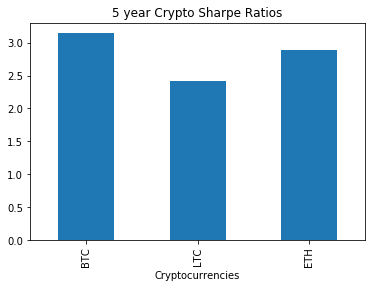

In [161]:
sharpe_plot=all_crypto_5yr_data_sharpe.plot.bar(title = "5 year Crypto Sharpe Ratios")
sharpe_plot.set(xlabel="Cryptocurrencies")
sharpe_plot.set_xticklabels(('BTC', 'LTC','ETH'))


In [71]:
## 2017 1 yr Crypto Sharpe Ratio
all_crypto_2017yr_data=all_crypto_data.loc['2016-03-10':'2017-03-10']
all_crypto_2017yr_data_sharpe=((all_crypto_2017yr_data[["BTC Daily Price Change (%)","LTC Daily Price Change (%)","ETH Daily Price Change (%)"]].mean()*365*1)-(1+((all_crypto_2017yr_data["tbills Close"].mean()/100))))/(all_crypto_std*np.sqrt(36*5))
all_crypto_2017yr_data_sharpe.rename(columns={'BTC Daily Price Change (%)': 'BTC', 'LTC Daily Price Change (%)': 'LTC','ETH Daily Price Change (%)': 'ETH' })
all_crypto_2017yr_data_sharpe.head()


BTC Daily Price Change (%)    0.150654
LTC Daily Price Change (%)   -0.582469
ETH Daily Price Change (%)    0.174971
dtype: float64

[Text(0, 0, 'BTC'), Text(0, 0, 'LTC'), Text(0, 0, 'ETH')]

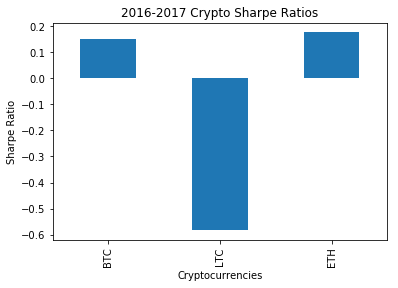

In [72]:
sharpe_plot=all_crypto_2017yr_data_sharpe.plot.bar(title = "2016-2017 Crypto Sharpe Ratios")
sharpe_plot.set(xlabel="Cryptocurrencies", ylabel="Sharpe Ratio")
sharpe_plot.set_xticklabels( ('BTC', 'LTC','ETH'))

In [73]:
## 2018 2 yr Crypto Sharpe Ratio
all_crypto_2018yr_data=all_crypto_data.loc['2016-03-10':'2018-03-10']
all_crypto_2018yr_data_sharpe=((all_crypto_2018yr_data[["BTC Daily Price Change (%)","LTC Daily Price Change (%)","ETH Daily Price Change (%)"]].mean()*365*2)-(1+((all_crypto_2018yr_data["tbills Close"].mean()/100))))/(all_crypto_std*np.sqrt(365*2))
all_crypto_2018yr_data_sharpe.rename(columns={'BTC Daily Price Change (%)': 'BTC', 'LTC Daily Price Change (%)': 'LTC','ETH Daily Price Change (%)': 'ETH' })
all_crypto_2018yr_data_sharpe.head()

BTC Daily Price Change (%)    2.519386
LTC Daily Price Change (%)    2.886367
ETH Daily Price Change (%)    3.061129
dtype: float64

[Text(0, 0, 'BTC'), Text(0, 0, 'LTC'), Text(0, 0, 'ETH')]

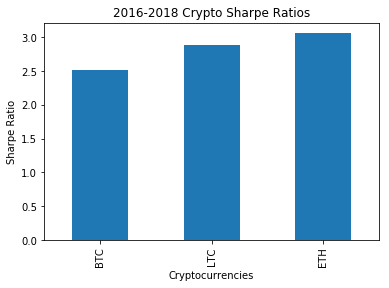

In [76]:
sharpe_plot=all_crypto_2018yr_data_sharpe.plot.bar(title = "2016-2018 Crypto Sharpe Ratios")
sharpe_plot.set(xlabel="Cryptocurrencies", ylabel="Sharpe Ratio")
sharpe_plot.set_xticklabels( ('BTC', 'LTC','ETH'))

In [74]:
## 2019 3 yr Crypto Sharpe Ratio
all_crypto_2019yr_data=all_crypto_data.loc['2016-03-10':'2019-03-10']
all_crypto_2019yr_data_sharpe=((all_crypto_2019yr_data[["BTC Daily Price Change (%)","LTC Daily Price Change (%)","ETH Daily Price Change (%)"]].mean()*365*3)-(1+((all_crypto_2019yr_data["tbills Close"].mean()/100))))/(all_crypto_std*np.sqrt(365*3))
all_crypto_2019yr_data_sharpe.rename(columns={'BTC Daily Price Change (%)': 'BTC', 'LTC Daily Price Change (%)': 'LTC','ETH Daily Price Change (%)': 'ETH' })
all_crypto_2019yr_data_sharpe.head()

BTC Daily Price Change (%)    1.608266
LTC Daily Price Change (%)    2.013906
ETH Daily Price Change (%)    1.913899
dtype: float64

[Text(0, 0, 'BTC'), Text(0, 0, 'LTC'), Text(0, 0, 'ETH')]

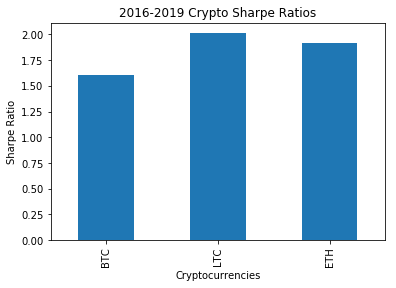

In [77]:
sharpe_plot=all_crypto_2019yr_data_sharpe.plot.bar(title = "2016-2019 Crypto Sharpe Ratios")
sharpe_plot.set(xlabel="Cryptocurrencies", ylabel="Sharpe Ratio")
sharpe_plot.set_xticklabels( ('BTC', 'LTC','ETH'))

In [75]:
## 2020 4 yr Crypto Sharpe Ratio
all_crypto_2020yr_data=all_crypto_data.loc['2016-03-10':'2019-03-10']
all_crypto_2020yr_data_sharpe=((all_crypto_2020yr_data[["BTC Daily Price Change (%)","LTC Daily Price Change (%)","ETH Daily Price Change (%)"]].mean()*365*4)-(1+((all_crypto_2020yr_data["tbills Close"].mean()/100))))/(all_crypto_std*np.sqrt(365*4))
all_crypto_2020yr_data_sharpe.rename(columns={'BTC Daily Price Change (%)': 'BTC', 'LTC Daily Price Change (%)': 'LTC','ETH Daily Price Change (%)': 'ETH' })
all_crypto_2020yr_data_sharpe.head()

BTC Daily Price Change (%)    2.077986
LTC Daily Price Change (%)    2.472588
ETH Daily Price Change (%)    2.362619
dtype: float64

[Text(0, 0, 'BTC'), Text(0, 0, 'LTC'), Text(0, 0, 'ETH')]

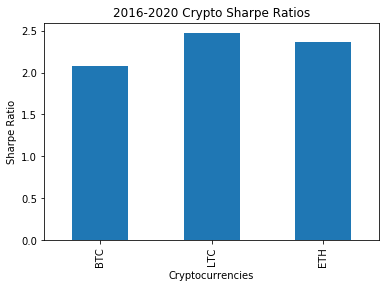

In [78]:
sharpe_plot=all_crypto_2020yr_data_sharpe.plot.bar(title = "2016-2020 Crypto Sharpe Ratios")
sharpe_plot.set(xlabel="Cryptocurrencies", ylabel="Sharpe Ratio")
sharpe_plot.set_xticklabels( ('BTC', 'LTC','ETH'))

In [116]:
one_yr_sharpe_df = pd.DataFrame(all_crypto_2017yr_data_sharpe)
two_yr_sharpe_df = pd.DataFrame(all_crypto_2018yr_data_sharpe)
three_yr_sharpe_df = pd.DataFrame(all_crypto_2019yr_data_sharpe)
four_yr_sharpe_df = pd.DataFrame(all_crypto_2020yr_data_sharpe)
five_yr_sharpe_df = pd.DataFrame(all_crypto_5yr_data_sharpe)

In [118]:
sharpe_frames=[one_yr_sharpe_df,two_yr_sharpe_df,three_yr_sharpe_df,four_yr_sharpe_df,five_yr_sharpe_df]
rolling_5yr_sharpe_df=pd.concat(sharpe_frames, axis=1)
sharpe_years=[1,2,3,4,5]
rolling_5yr_sharpe_df.columns=[sharpe_years]
sharpe_cryptos=['BTC','LTC','ETH']
rolling_5yr_sharpe_df.index = [sharpe_cryptos] 
rolling_5yr_sharpe_df.head(15)

,1,2,3,4,5
BTC,0.150654,2.519386,1.608266,2.077986,3.148346
LTC,-0.582469,2.886367,2.013906,2.472588,2.416602
ETH,0.174971,3.061129,1.913899,2.362619,2.883099


In [129]:
rolling_5yr_sharpe_df=rolling_5yr_sharpe_df.transpose()
rolling_5yr_sharpe_df

,1,2,3,4,5
BTC,0.150654,2.519386,1.608266,2.077986,3.148346
LTC,-0.582469,2.886367,2.013906,2.472588,2.416602
ETH,0.174971,3.061129,1.913899,2.362619,2.883099


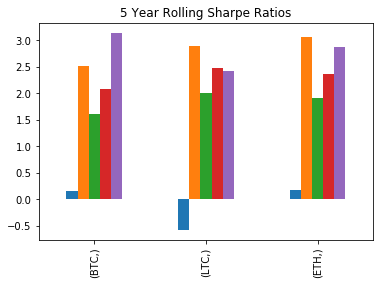

In [155]:
rolling_5yr_sharpe_df.plot(kind="bar", title= "5 Year Rolling Sharpe Ratios", legend=None)


In [189]:
# all_correlation=all_crypto_5yr_data.corr()
# all_correlation
Transaction_Price = all_crypto_5yr_data[['BTC Price','LTC Price','ETH Price',
                                               'BTC Transactions',"LTC Transactions","ETH Transactions"]]
Transaction_Price_corr=Transaction_Price.corr()

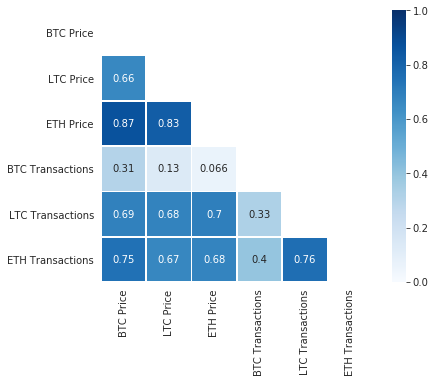

In [199]:
mask2 = np.zeros_like(Transaction_Price_corr)
mask2[np.triu_indices_from(mask2)] = True
with sns.axes_style("white"):
    f2, ax2 = plt.subplots(figsize=(7, 5))
    ax2 = sns.heatmap(Transaction_Price_corr, mask=mask2, vmin=0, vmax=1, square=True, cmap="Blues", annot=True, linewidths=.5)
# sns.heatmap(Transaction_Price_corr, vmin=0, vmax=1, cmap="Blues", linewidths=.5)

In [162]:
list(all_crypto_data.columns.values) 

['BTC Price',
 'BTC Daily Price Change (%)',
 'BTC Volume',
 'BTC Market Cap',
 'BTC Mining Revenue',
 'BTC RHDOL Ratio',
 'BTC Supply',
 'BTC Total Addresses',
 'BTC Sending Addresses',
 'BTC Receiving Addresses',
 'BTC Active Addresses',
 'BTC Transactions',
 'LTC Price',
 'LTC Daily Price Change (%)',
 'LTC Volume',
 'LTC Market Cap',
 'LTC Mining Revenue',
 'LTC Supply',
 'LTC Total Addresses',
 'LTC Sending Addresses',
 'LTC Receiving Addresses',
 'LTC Active Addresses',
 'LTC Transactions',
 'ETH Price',
 'ETH Daily Price Change (%)',
 'ETH Volume',
 'ETH Market Cap',
 'ETH Blocks Mined',
 'ETH Circulating Supply',
 'ETH Total Addresses',
 'ETH Sending Addresses',
 'ETH Receiving Addresses',
 'ETH Active Addresses',
 'ETH Transactions',
 'tbills Close']

'0.11.0'